In [134]:
from qiskit import QuantumRegister, QuantumCircuit, execute
from qiskit.quantum_info.operators import Operator
from qiskit.visualization import plot_histogram, plot_state_city
from qiskit import Aer
import numpy as np
from math import sin, cos, atan2
import matplotlib.pyplot as plt
from numpy.linalg import norm,svd

In [135]:
def two_qubit_state(ckt,A):
    A=np.transpose(np.reshape(A,(2,2)))
    #A=np.reshape(A,(2,2))
    U,S,V=np.linalg.svd(A)
    
    ckt.u3(2*atan2(S[1],S[0]),0,0,0)
    ckt.cx(0,1)
    ckt.unitary(Operator(U), [0])
    ckt.unitary(Operator(np.transpose(V)), [1])
    ckt.barrier()
    
    return ckt

In [136]:
A=np.random.rand(4,4)
A=A/np.linalg.norm(A)
print(A**2,round(np.sum(A**2),2))

U,S,V=np.linalg.svd(A)
print(S)

[[3.41858702e-02 2.52353265e-03 7.72392001e-02 4.26772149e-04]
 [6.56430710e-02 6.23699567e-02 5.57667217e-03 4.13206107e-02]
 [2.57402649e-01 2.60409004e-03 7.48820982e-02 2.90946947e-05]
 [6.37667893e-02 6.31543991e-02 4.08472836e-03 2.44790466e-01]] 1.0
[0.86038631 0.4774479  0.14554598 0.10293327]


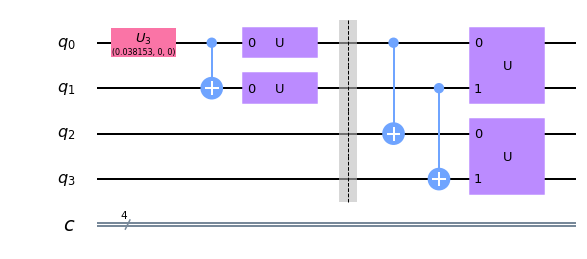

In [137]:
ckt=QuantumCircuit(4,4)
ckt=two_qubit_state(ckt,S)
ckt.cx(0,2)
ckt.cx(1,3)
ckt.unitary(Operator(U), [0,1])
ckt.unitary(Operator(np.transpose(V)), [2,3])
#ckt.measure([0,1,2,3],[0,1,2,3])
ckt.draw(output='mpl')

In [138]:
backend = Aer.get_backend('statevector_simulator')
job=execute(ckt,backend)
result = job.result()
outputstate = result.get_statevector(ckt, decimals=3)

print(np.reshape(np.real(outputstate),(4,4)))
print(np.round(A,3),'\n')

[[0.185 0.256 0.507 0.253]
 [0.05  0.25  0.051 0.251]
 [0.278 0.075 0.274 0.064]
 [0.021 0.203 0.005 0.495]]
[[0.185 0.05  0.278 0.021]
 [0.256 0.25  0.075 0.203]
 [0.507 0.051 0.274 0.005]
 [0.253 0.251 0.064 0.495]] 



In [139]:
'''backend = Aer.get_backend('qasm_simulator')
job_sim = execute(ckt,backend,shots=100000)
result_sim = job_sim.result()
counts = result_sim.get_counts(ckt)
print(np.round(A**2,3))
plot_state_city(result_sim.get_statevector)'''

"backend = Aer.get_backend('qasm_simulator')\njob_sim = execute(ckt,backend,shots=100000)\nresult_sim = job_sim.result()\ncounts = result_sim.get_counts(ckt)\nprint(np.round(A**2,3))\nplot_state_city(result_sim.get_statevector)"

In [140]:
print(np.reshape(np.real(np.round(outputstate**2,3)),(4,4)))
print(np.round(A**2,3))

[[0.034 0.066 0.257 0.064]
 [0.003 0.062 0.003 0.063]
 [0.077 0.006 0.075 0.004]
 [0.    0.041 0.    0.245]]
[[0.034 0.003 0.077 0.   ]
 [0.066 0.062 0.006 0.041]
 [0.257 0.003 0.075 0.   ]
 [0.064 0.063 0.004 0.245]]


In [141]:
X=np.random.rand(4,2)
X=X/norm(X)
U,S,V=np.linalg.svd(X)

In [142]:
np.sum(S**2)

1.0